<a href="https://colab.research.google.com/github/SAULIZA/nacimientos_defuncion/blob/main/Proyecto_def_nac_visuales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desarrollo del modelo del proyecto
**Proyecto 2 - Parte 4 (base)**
* Crado por: Saúl Iza
* Fecha de realización: 23/04/2023
* Fecha de modificación: 23/04/2023

## Garantiza que completes los pasos de preprocesamiento adecuados

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn import set_config
set_config(display='diagram')

In [3]:
#Checamos el marco de datos final
#Datos de nacimientos y defunciones
df = pd.read_csv("/content/drive/MyDrive/Codificación de Dojo/Proyecto2/defuncion_nacimientos.csv")

<ipython-input-3-87ffbd5a6431>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Codificación de Dojo/Proyecto2/defuncion_nacimientos.csv")


In [4]:
# corregimos los tipos de datos que se encuentran mezclados
meses = {"1":"Enero","2":"Febrero","3":"Marzo","4":"Abril","5":"Mayo","6":"Junio","7":"Julio","8":"Agosto","9":"Septiembre","10":"Octubre","11":"Noviembre","12":"Diciembre"}
df["mes"] = df["mes"].replace(meses)

In [5]:
meses = {1:"Enero",2:"Febrero",3:"Marzo",4:"Abril",5:"Mayo",6:"Junio",7:"Julio",8:"Agosto",9:"Septiembre",10:"Octubre",11:"Noviembre",12:"Diciembre"}
df["mes"] = df["mes"].replace(meses)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750128 entries, 0 to 1750127
Data columns (total 25 columns):
 #   Column      Dtype  
---  ------      -----  
 0   sexo        object 
 1   sem_gest    float64
 2   anio        float64
 3   mes         object 
 4   p_emb       object 
 5   lugar_ocur  object 
 6   provincia   object 
 7   canton      object 
 8   parroquia   object 
 9   asis_por    object 
 10  area        object 
 11  edad_mad    float64
 12  con_pren    float64
 13  hij_viv     float64
 14  hij_vivm    float64
 15  hij_nacm    float64
 16  etnia       object 
 17  est_civil   object 
 18  sabe_leer   object 
 19  niv_inst    object 
 20  prov_res    object 
 21  cant_res    object 
 22  parr_res    object 
 23  area_res    object 
 24  Estado      int64  
dtypes: float64(7), int64(1), object(17)
memory usage: 333.8+ MB


In [7]:
df.isna().sum()

sexo             0
sem_gest         0
anio             0
mes              0
p_emb            0
lugar_ocur       0
provincia        0
canton           0
parroquia      192
asis_por         0
area             0
edad_mad         0
con_pren         0
hij_viv          0
hij_vivm         0
hij_nacm         0
etnia            0
est_civil        0
sabe_leer        0
niv_inst         0
prov_res         1
cant_res         1
parr_res      1193
area_res         0
Estado           0
dtype: int64

In [8]:
df["Estado"].value_counts()

1    1738568
0      11560
Name: Estado, dtype: int64

* Revisión de datos categóricos

In [9]:
# checamos la distribución de datos por estados vivo o muerto
df["sexo"].value_counts()

Hombre             895190
Mujer              854795
Indeterminado         133
Sin informacion        10
Name: sexo, dtype: int64

In [10]:
#reemplazo de calses
df["sexo"] = df["sexo"].replace("Sin informacion","Indeterminado")

In [11]:
df["mes"].value_counts()

Mayo          156736
Marzo         153085
Julio         152773
Agosto        151606
Abril         150228
Septiembre    149107
Junio         148606
Octubre       144780
Enero         142145
Noviembre     135048
Febrero       133897
Diciembre     132117
Name: mes, dtype: int64

In [12]:
df["p_emb"].value_counts()

Simple             1724614
Doble                25018
Triple                 444
Cuadruple_o_mas         33
Quintuple               10
Cuadruple                9
Name: p_emb, dtype: int64

In [13]:
#reemplazo de calses
df["p_emb"] = df["p_emb"].replace("Cuadruple","Cuadruple_o_mas")
df["p_emb"] = df["p_emb"].replace("Quintuple","Cuadruple_o_mas")

In [14]:
df["p_emb"].value_counts()

Simple             1724614
Doble                25018
Triple                 444
Cuadruple_o_mas         52
Name: p_emb, dtype: int64

In [15]:
df["lugar_ocur"].value_counts()

Establecimiento_ministerio_de_salud     1089277
Hospital_clinica_consultorio_privado     411629
Establecimiento_IESS                     153857
Establecimiento_junta_beneficiaria        60658
Otro_establecimiento_publico              17430
Casa                                      12640
Otro                                       4637
Name: lugar_ocur, dtype: int64

In [16]:
df["asis_por"].value_counts()

Medico                        1538444
Obstetra                       201680
Otro                             5271
Partero/a no calilficado/a       3354
Partero/a calificado/a           1008
Auxiliar_enfermeria               153
Enfermero/a                       119
Medico Legista                     98
Enfermero_a                         1
Name: asis_por, dtype: int64

In [17]:
#reemplazo de clases
df["asis_por"] = df["asis_por"].replace("Enfermero_a","Enfermero/a")

In [18]:
df["etnia"].value_counts()

Mestiza                              1577998
Indigena                               94243
Negra                                  17033
Blanca                                 13521
Afroecuatoriana/Afrodescendiente       11666
Montubia                               10428
Mulata                                  6660
Otra                                    6504
Ignorado                                5260
Afro_ecuatoriana                        2470
Sin informacion                         2419
Afroecuatoriana/ Afrodescendiente       1926
Name: etnia, dtype: int64

In [19]:
#reemplazo de clases
df["etnia"] = df["etnia"].replace("Afro_ecuatoriana","Afroecuatoriana/Afrodescendiente")
df["etnia"] = df["etnia"].replace("Afroecuatoriana/ Afrodescendiente","Afroecuatoriana/Afrodescendiente")

In [20]:
df["est_civil"].value_counts()

Soltera           704966
Casada            503711
Unida             429076
Union libre        36343
Union de hecho     34711
Divorciada         27810
Se ignora           7397
Viuda               3154
Separada            2960
Name: est_civil, dtype: int64

In [21]:
df["sabe_leer"].value_counts()

Si          1736523
No             9166
Ignorado       4439
Name: sabe_leer, dtype: int64

In [22]:
df["niv_inst"].value_counts()

Secundaria                        387271
Educacion Media / Bachillerato    349362
Educacion_basica                  332412
Primaria                          250462
Superior universitario            221147
Superior                           75139
Superior no universitario          53019
Educacion basica                   37656
Se_ignora                          18789
Ninguno                             9511
Ciclo_post_bachillerato             7783
Postgrado                           4254
Centro_de_alfabetizacion            1245
Centro de alfabetizacion            1150
Posgrado                             928
Name: niv_inst, dtype: int64

In [23]:
df["niv_inst"] = df["niv_inst"].replace("Educacion basica","Educacion_basica")
df["niv_inst"] = df["niv_inst"].replace("Postgrado","Posgrado")
df["niv_inst"] = df["niv_inst"].replace("Centro de alfabetizacion","Centro_de_alfabetizacion")

In [24]:
df["area_res"].value_counts()

Urbana    1352606
Rural      397522
Name: area_res, dtype: int64

* Revisión de datos numéricos

In [25]:
df.describe()

,sem_gest,anio,edad_mad,con_pren,hij_viv,hij_vivm,hij_nacm,Estado
count,1.750128e+06,1.750128e+06,1.750128e+06,1.750128e+06,1.750128e+06,1.750128e+06,1.750128e+06,1.750128e+06
mean,3.847461e+01,2.017665e+03,2.598883e+01,6.511601e+00,2.074787e+00,2.675233e-02,3.251705e-02,9.933948e-01
std,1.941852e+00,2.332091e+00,6.639087e+00,2.636681e+00,1.252714e+00,1.993022e-01,2.152535e-01,8.100374e-02
min,1.200000e+01,2.000000e+03,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.800000e+01,2.016000e+03,2.100000e+01,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,3.900000e+01,2.018000e+03,2.500000e+01,6.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,4.000000e+01,2.020000e+03,3.100000e+01,8.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,9.900000e+01,2.021000e+03,5.600000e+01,2.500000e+01,1.900000e+01,1.000000e+01,1.300000e+01,1.000000e+00


In [26]:
#semana de gestación
df.loc[df["sem_gest"] == 99,:].head()

,sexo,sem_gest,anio,mes,p_emb,lugar_ocur,provincia,canton,parroquia,asis_por,...,hij_nacm,etnia,est_civil,sabe_leer,niv_inst,prov_res,cant_res,parr_res,area_res,Estado
1738658,Hombre,99.0,2016.0,Enero,Simple,Hospital_clinica_consultorio_privado,Guayas,Guayaquil,"Guayaquil, cabecera cantonal y capital provincial",Medico,...,1.0,Mestiza,Casada,Si,Superior,Guayas,Guayaquil,Tarqui,Urbana,0
1738734,Hombre,99.0,2016.0,Mayo,Simple,Hospital_clinica_consultorio_privado,Pichincha,Quito,"Quito Distrito Metropolitano, cabecera cantona...",Medico,...,1.0,Mestiza,Casada,Si,Superior,Pichincha,Quito,La Magadalena,Urbana,0
1738890,Mujer,99.0,2016.0,Mayo,Simple,Establecimiento_junta_beneficiaria,Guayas,Guayaquil,Tarqui,Medico,...,1.0,Mestiza,Soltera,No,Ninguno,Los Rios,Quevedo,San Carlos,Rural,0
1739068,Hombre,99.0,2016.0,Marzo,Simple,Establecimiento_IESS,Azuay,Cuenca,"Cuenca, cabecera cantonal y capital provincial",Medico,...,1.0,Mestiza,Unida,Si,Superior,Azuay,Cuenca,Totoracocha,Urbana,0
1739131,Mujer,99.0,2016.0,Noviembre,Simple,Establecimiento_IESS,Manabi,Manta,"Manta, cabecera cantonal",Medico,...,1.0,Mestiza,Unida,Si,Secundaria,Manabi,Montecristi,El Colorado,Urbana,0


In [27]:
#eliminamos las semanas de gestación igual a 99
df = df.loc[df["sem_gest"] != 99,:]

In [28]:
#eliminamos registros de datos menores a 2012
df = df.loc[df["anio"] > 2011,:]

In [29]:
#verificamos
df.describe()

,sem_gest,anio,edad_mad,con_pren,hij_viv,hij_vivm,hij_nacm,Estado
count,1.750112e+06,1.750112e+06,1.750112e+06,1.750112e+06,1.750112e+06,1.750112e+06,1.750112e+06,1.750112e+06
mean,3.847421e+01,2.017665e+03,2.598880e+01,6.511612e+00,2.074794e+00,2.675143e-02,3.250821e-02,9.934039e-01
std,1.935346e+00,2.332011e+00,6.639058e+00,2.636669e+00,1.252710e+00,1.993004e-01,2.152346e-01,8.094840e-02
min,1.200000e+01,2.012000e+03,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.800000e+01,2.016000e+03,2.100000e+01,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,3.900000e+01,2.018000e+03,2.500000e+01,6.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,4.000000e+01,2.020000e+03,3.100000e+01,8.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,4.200000e+01,2.021000e+03,5.600000e+01,2.500000e+01,1.900000e+01,1.000000e+01,1.300000e+01,1.000000e+00


In [30]:
##Guardamos el data frame en un archivo
#df.to_csv('datos_nac_def_limpio.csv', index=False)

## Visualiación

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1750112 entries, 0 to 1750127
Data columns (total 25 columns):
 #   Column      Dtype  
---  ------      -----  
 0   sexo        object 
 1   sem_gest    float64
 2   anio        float64
 3   mes         object 
 4   p_emb       object 
 5   lugar_ocur  object 
 6   provincia   object 
 7   canton      object 
 8   parroquia   object 
 9   asis_por    object 
 10  area        object 
 11  edad_mad    float64
 12  con_pren    float64
 13  hij_viv     float64
 14  hij_vivm    float64
 15  hij_nacm    float64
 16  etnia       object 
 17  est_civil   object 
 18  sabe_leer   object 
 19  niv_inst    object 
 20  prov_res    object 
 21  cant_res    object 
 22  parr_res    object 
 23  area_res    object 
 24  Estado      int64  
dtypes: float64(7), int64(1), object(17)
memory usage: 347.2+ MB


In [33]:
dfDefunc = df.loc[df["Estado"] == 0,:]
dfNac = df.loc[df["Estado"] == 1,:]

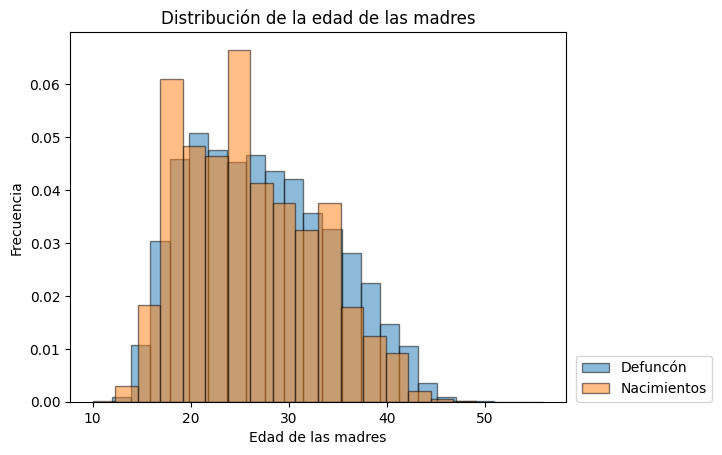

In [34]:
plt.hist(dfDefunc["edad_mad"], label = "Defuncón", bins=20, edgecolor = "black" , alpha = 0.5, density = True)
plt.hist(dfNac["edad_mad"], label= "Nacimientos", bins=20, edgecolor = "black" , alpha=0.5, density = True)
plt.title("Distribución de la edad de las madres")
plt.xlabel("Edad de las madres")
plt.ylabel("Frecuencia")
#plt.xlim(left=2011, right=2016)
plt.legend(loc=(1.02, 0));

* En el gráfico de histograma de las edades de las madres que han dado a luz o han dado como resultado en una defunsión fetal, se puede observar que la mayoría de defunciones se da en madres entre los 17 y 35 años de edad. Mientras que un nacimiento se da en madres entre 20 y 30 años en la mayoría de los casos.

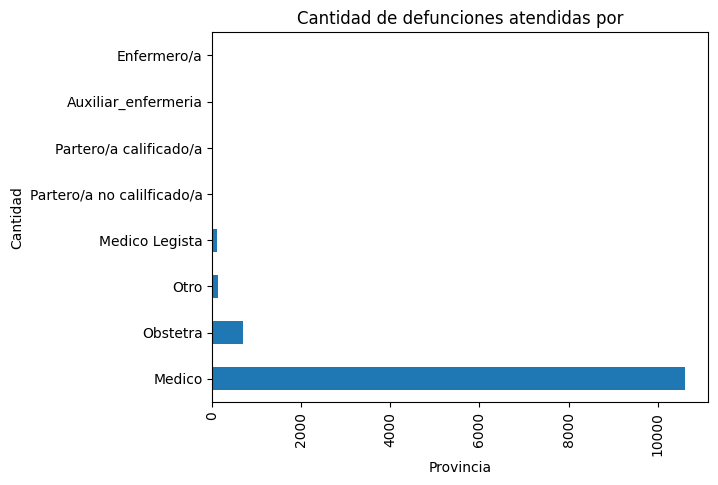

In [46]:
dfDefunc["asis_por"].value_counts().plot(kind="barh")
plt.xlabel("Cantidad")
plt.title("Cantidad de defunciones atendidas por")
plt.xticks(rotation=90)
plt.ylabel("Personal de asistencia")
plt.show()

* En el gráfico de barras de cantidad de defunciones se ve que en el caso de las defunciones Los médicos u obsteras son los que atienden estos casos, al haber una complicación de nacimiento se esperaría observar una mayor intervención de un obstetra, esto no se ve, tal vez es una pequeña muestra de que las defunciones tal vez se den debido a la falta de intervención de médicos especialistas.

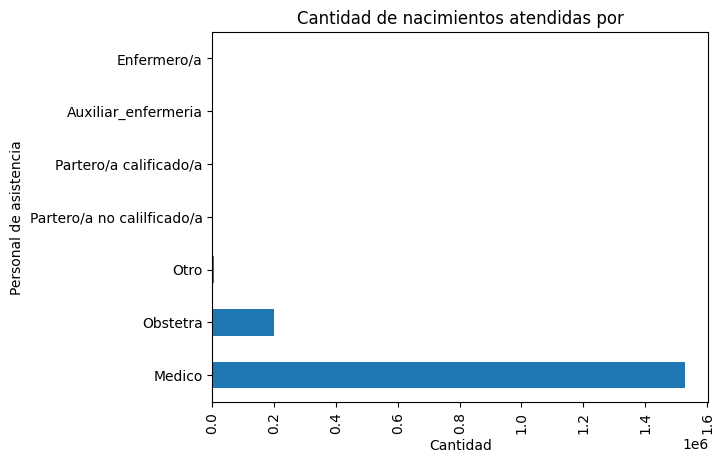

In [47]:
dfNac["asis_por"].value_counts().plot(kind="barh")
plt.xlabel("Cantidad")
plt.title("Cantidad de nacimientos atendidas por")
plt.xticks(rotation=90)
plt.ylabel("Personal de asistencia")
plt.show()

* En el gráfico de cantida de nacimientos registrados se puede ver que en el caso de los nacimientos también se repite el mismo patrón que en el caso de las defunciones, pero esta vez las atenciones por parte de obstetras son mayores en número, de hecho mucho mayores.

Text(0, 0.5, 'Número de hijos nacidos muertos')

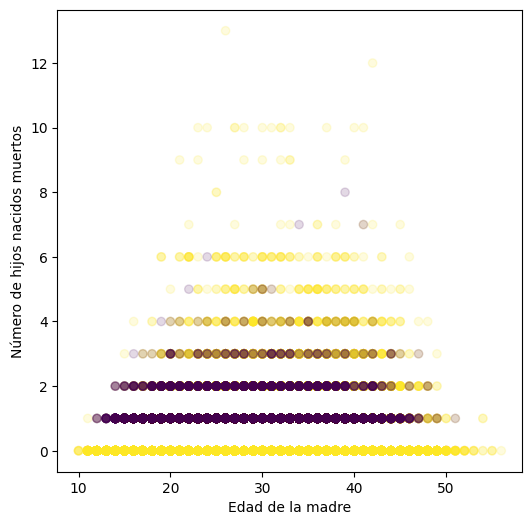

In [40]:
fig, axes = plt.subplots(1,1, figsize=(6,6))
axes.scatter(df['edad_mad'], df['hij_nacm'], c = df['Estado'], alpha=0.15)
axes.set_xlabel('Edad de la madre')
axes.set_ylabel('Número de hijos nacidos muertos')

* En el gráfico de disperción de la parte superior se puede ver las edades de las madres vs el número de hijos muertos, se puede observar como hay una segmentación para el caso de las defunciones, ya que estos se encuentran concentrados entre los número 1 y 3 de hijos nacidos muertos. Esto tal vez evidencia que las madres que no pueden dar a luz ya tienen un historial de estos casos.

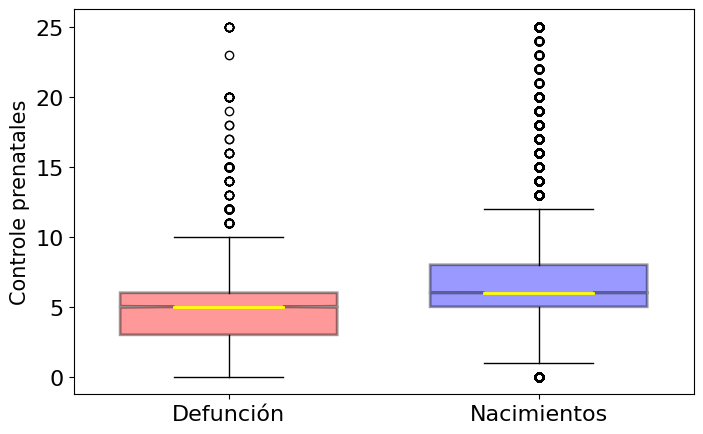

In [44]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([dfDefunc["con_pren"],dfNac["con_pren"]],
           notch = True,
           labels=['Defunción', 'Nacimientos'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );
# The more you understand any library, the more you can do
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
#plt.xlabel('diagnosis', fontsize = 20);
plt.ylabel('Controle prenatales', fontsize = 15);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);
     

* Por último, el diagrama de caja y bigotes que se indica nos muestra el número de controles prenatales en los casos de defunciones y nacimientos. Se puede observar que la media de las defunciones se encuentra mas abajo, esto quiere decir que en el caso de defunciones fetales no hay un control prenatal seguido o de mayor número, esto es importante para que no exista complicaciones luego. Se puede observar una presentación en este link https://udlaec-my.sharepoint.com/personal/telmo_iza_udla_edu_ec/Documents/Recordings/Meeting%20with%20(Estudiante)%20Telmo%20Saul%20Iza%20Farinango-20230506_220345-Meeting%20Recording.mp4?web=1